In [4]:
import os
import sys
import mmap
import time
import cv2

sys.path.append("/Users/zhd/packages/CaImAn/")
import matplotlib.pyplot as plt
import numpy as np
import superpixel_analysis as sup

from mpl_toolkits.axes_grid1 import make_axes_locatable

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
data_dir = "/Users/zhd/Desktop/Research/Project/IARPA data/data/"

In [6]:
out_dir='/Users/zhd/Desktop/Research/Project/IARPA data/result/try4/'

In [7]:
Yd1 = np.load(data_dir + 'scan1_block1_gpca_p1.npz')["data"]
Yd2 = np.load(data_dir + 'scan1_block1_gpca_p2.npz')["data"]
Yd3 = np.load(data_dir + 'scan1_block1_gpca_p3.npz')["data"]

In [8]:
Yd = np.concatenate([Yd1, Yd2, Yd3],axis=1)

In [9]:
del(Yd1,Yd2,Yd3)

In [10]:
dims = Yd.shape;
num_plane = 3;

# full pipeline

start 1 pass!
3d data!
12.239423990249634
rank 1 svd!
18.783125162124634
find pure superpixels!
1.9204998016357422
prepare iteration!
1.4254891872406006
14.679908752441406


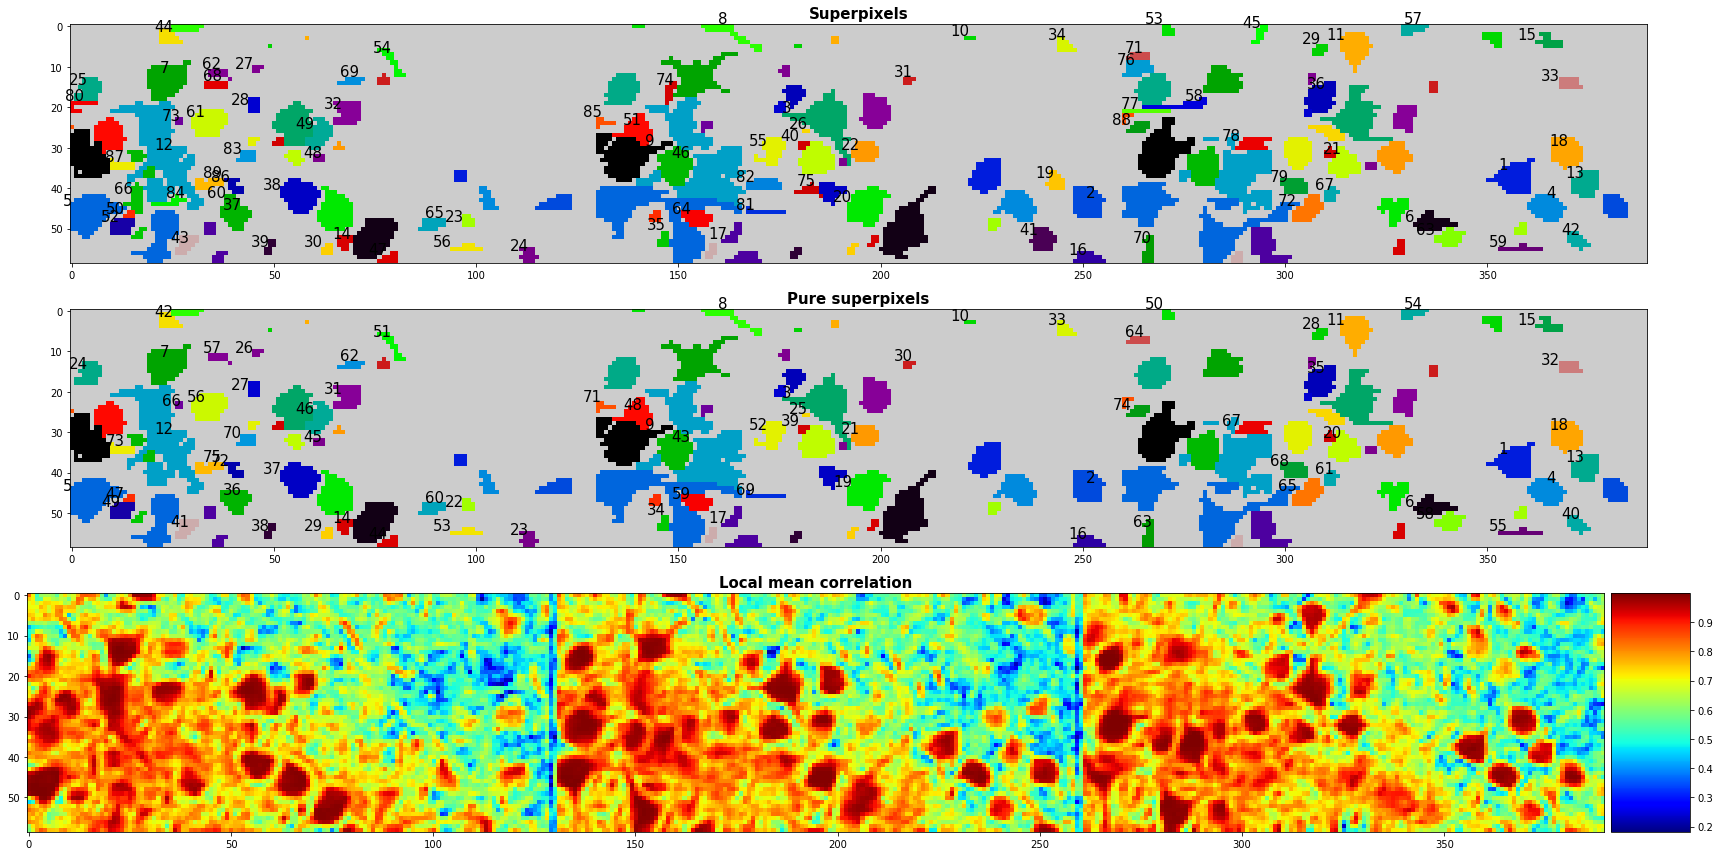

start 1 pass iteration!
time: 2.6104938983917236
no merge!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
time: 6.23365592956543
time: 3.1988890171051025


/Users/zhd/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:484: RuntimeWarning: invalid value encountered in true_divide
  return np.true_divide(self.todense(), other)
/Users/zhd/Desktop/Research/Project/IARPA data/code/push/axon-pipeline/superpixel_analysis.py:2027: RuntimeWarning: invalid value encountered in greater
  cri = np.asarray((cor_corr/(temp.T)) > merge_overlap_thr)*np.asarray((cor_corr/temp) > merge_overlap_thr)*((a_corr>0).toarray());#.toarray())*(((cor_corr/(temp.T)) > merge_overlap_thr).toarray())*((a_corr > 0).toarray());


no merge!
corr too low!
corr too low!
corr too low!
time: 7.495171070098877
time: 3.4368672370910645
34.155746936798096
start 2 pass!
3d data!
11.963108777999878
rank 1 svd!
8.790580034255981
find pure superpixels!
2.007891893386841
prepare iteration!
7.700839042663574


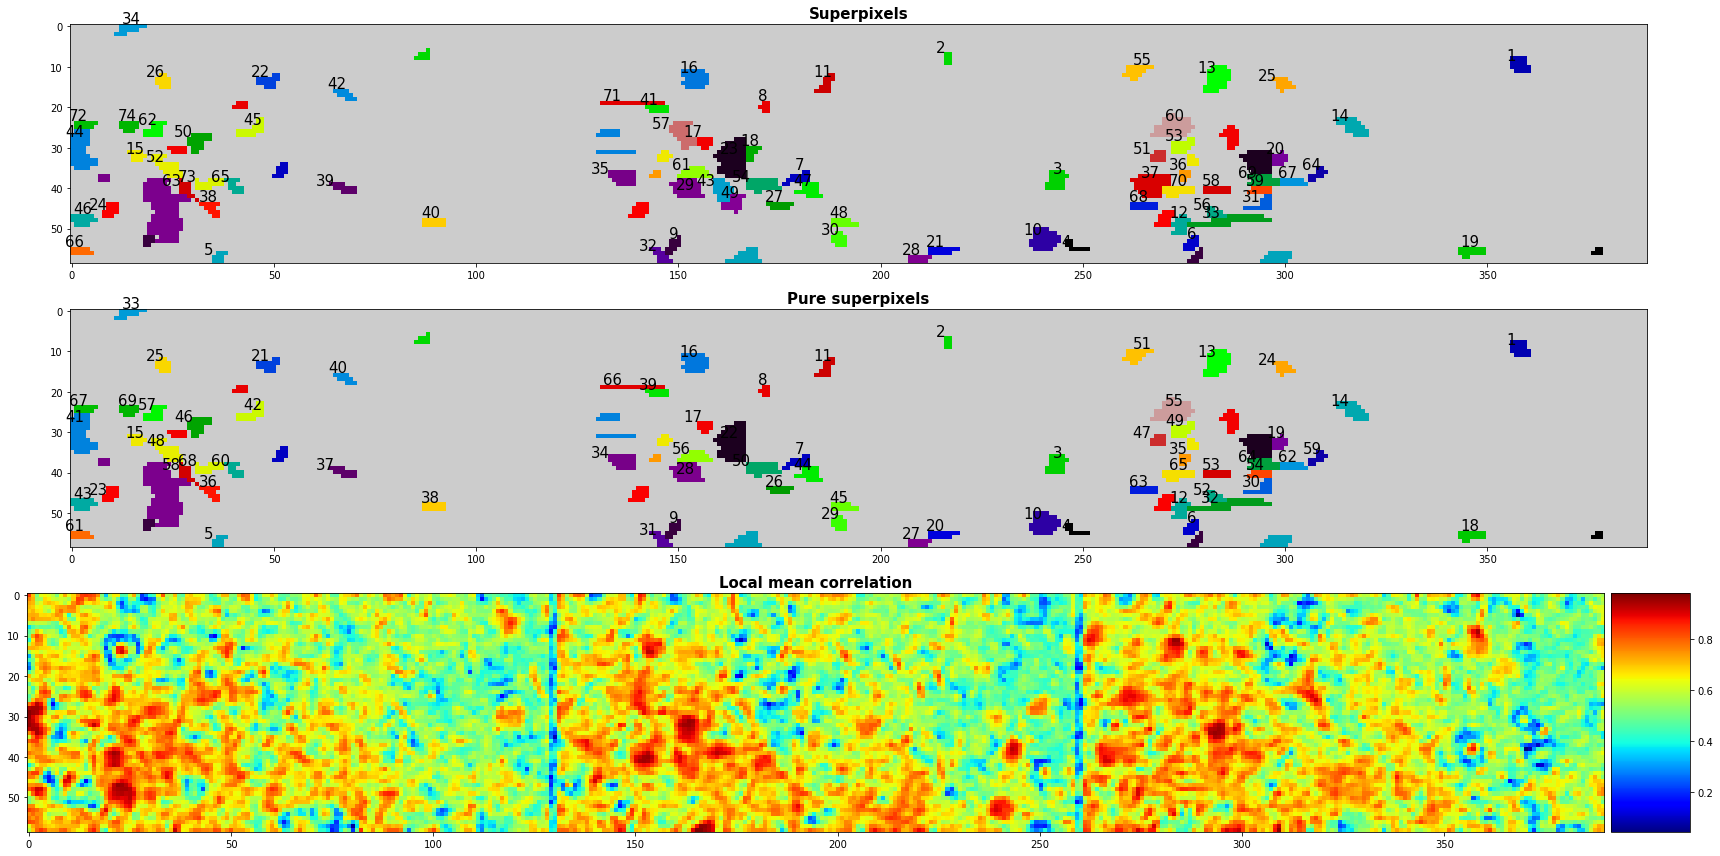

start 2 pass iteration!
time: 4.405954837799072
no merge!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
time: 10.90781283378601
time: 3.657356023788452
no merge!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
time: 8.288780927658081
time: 3.5794410705566406
47.263365745544434
start 3 pass!
3d data!
12.026431322097778
rank 1 svd!
9.813057899475098
find pure superpixels!
11.227050065994263
prepare iteration!
7.677555322647095


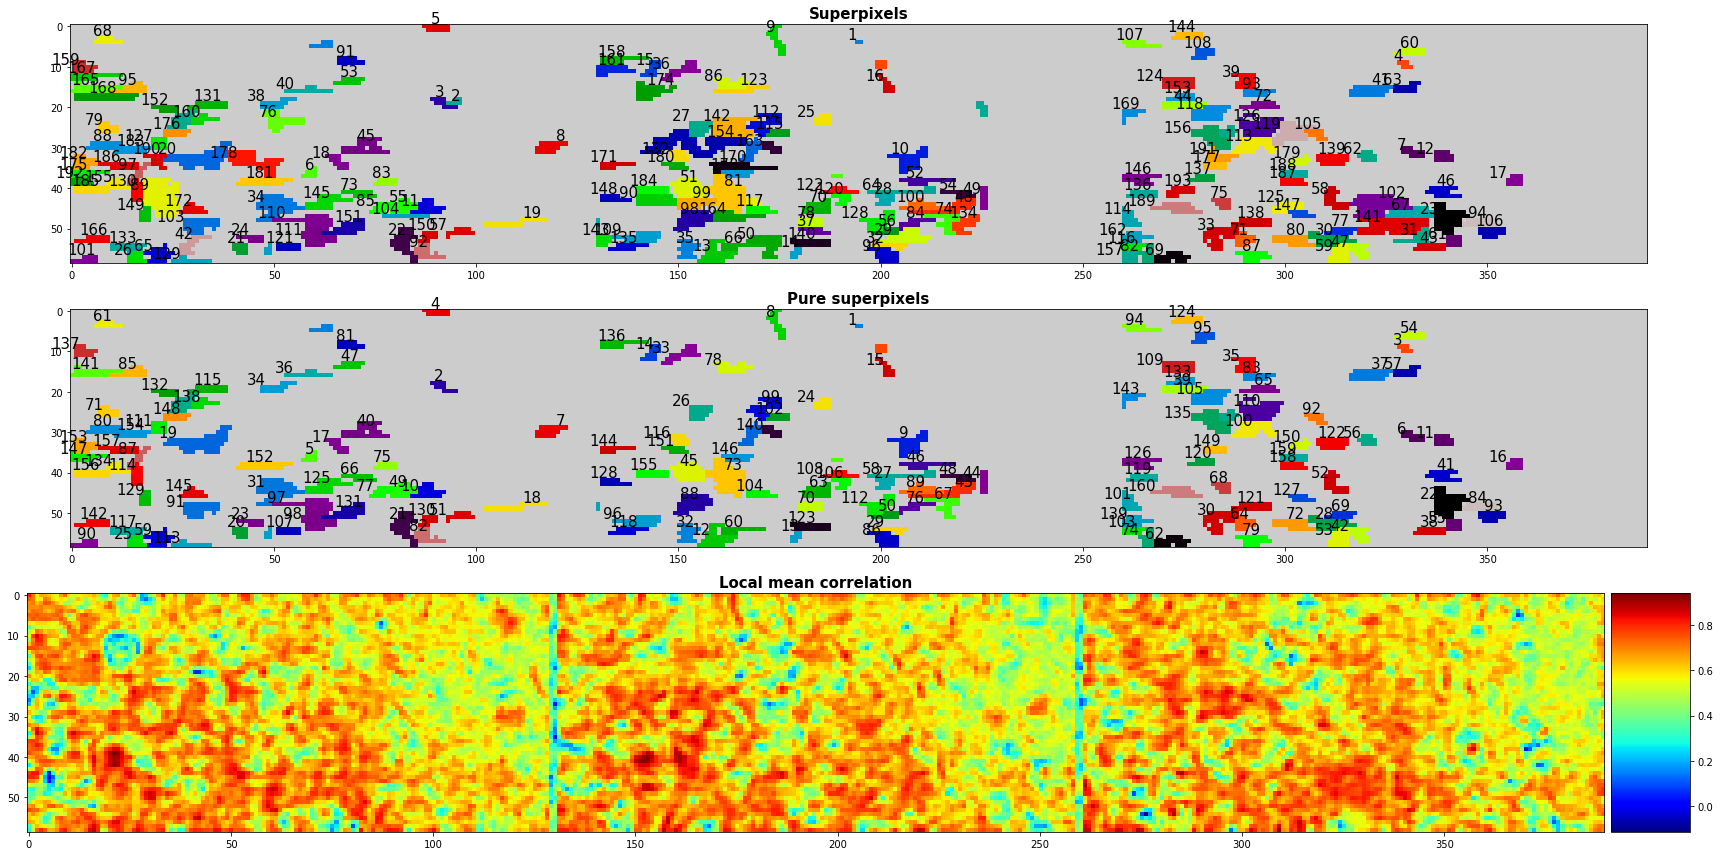

start 3 pass iteration!
time: 6.380950927734375
merge[62 13 86]


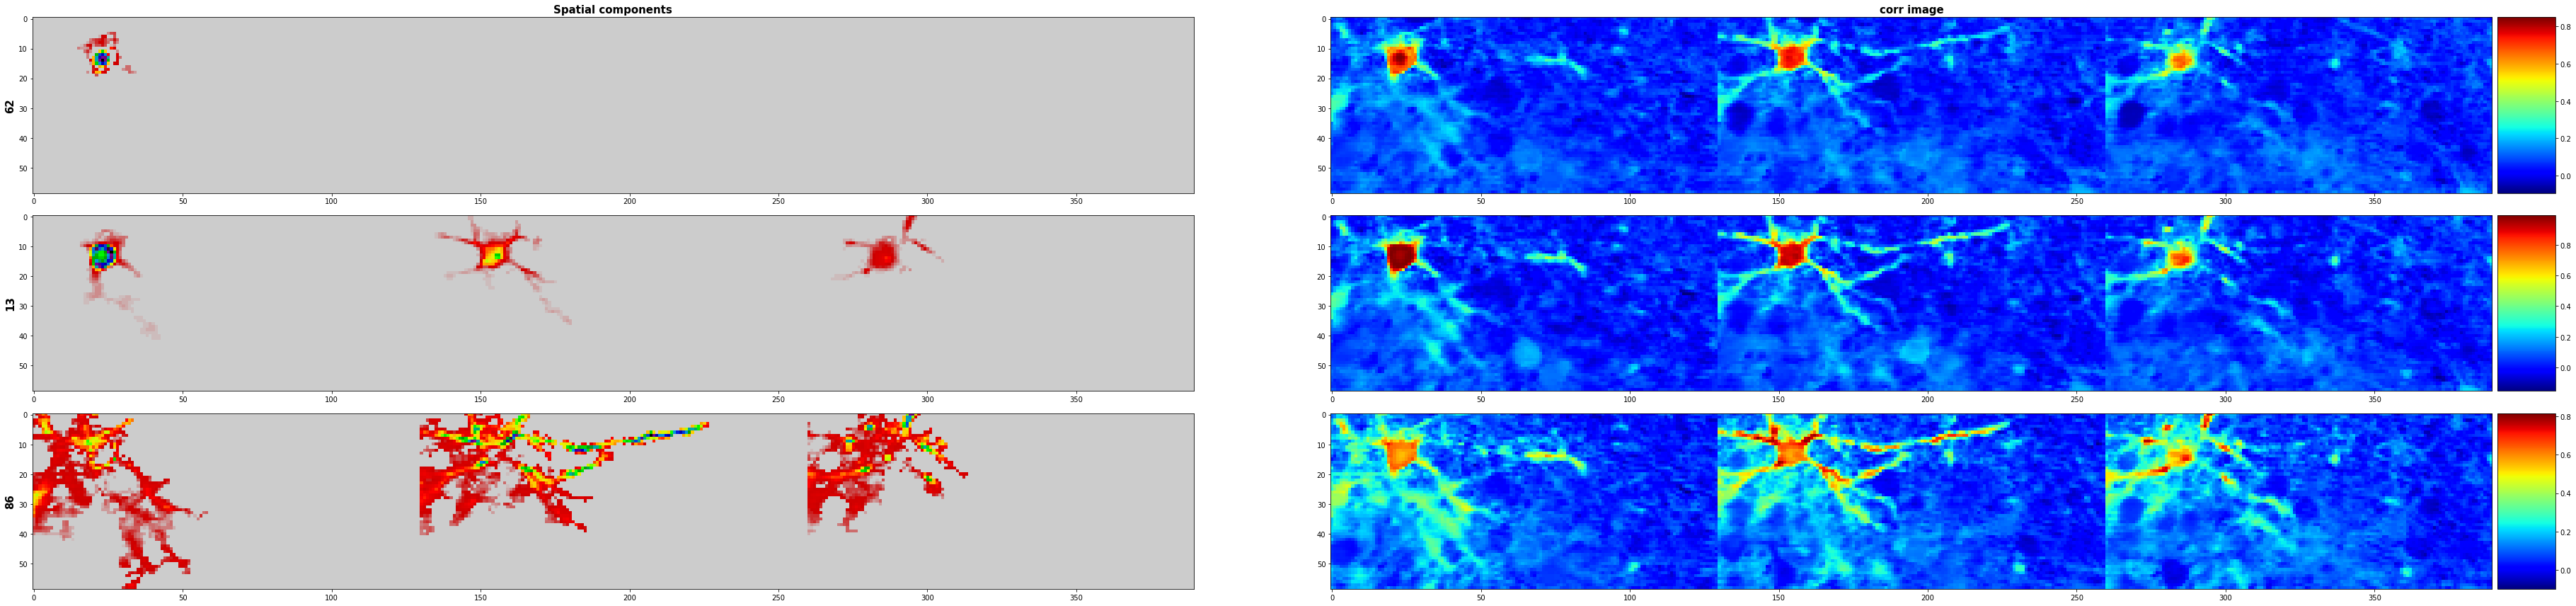

corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
time: 17.541911125183105
time: 4.953506231307983
merge[51 62]


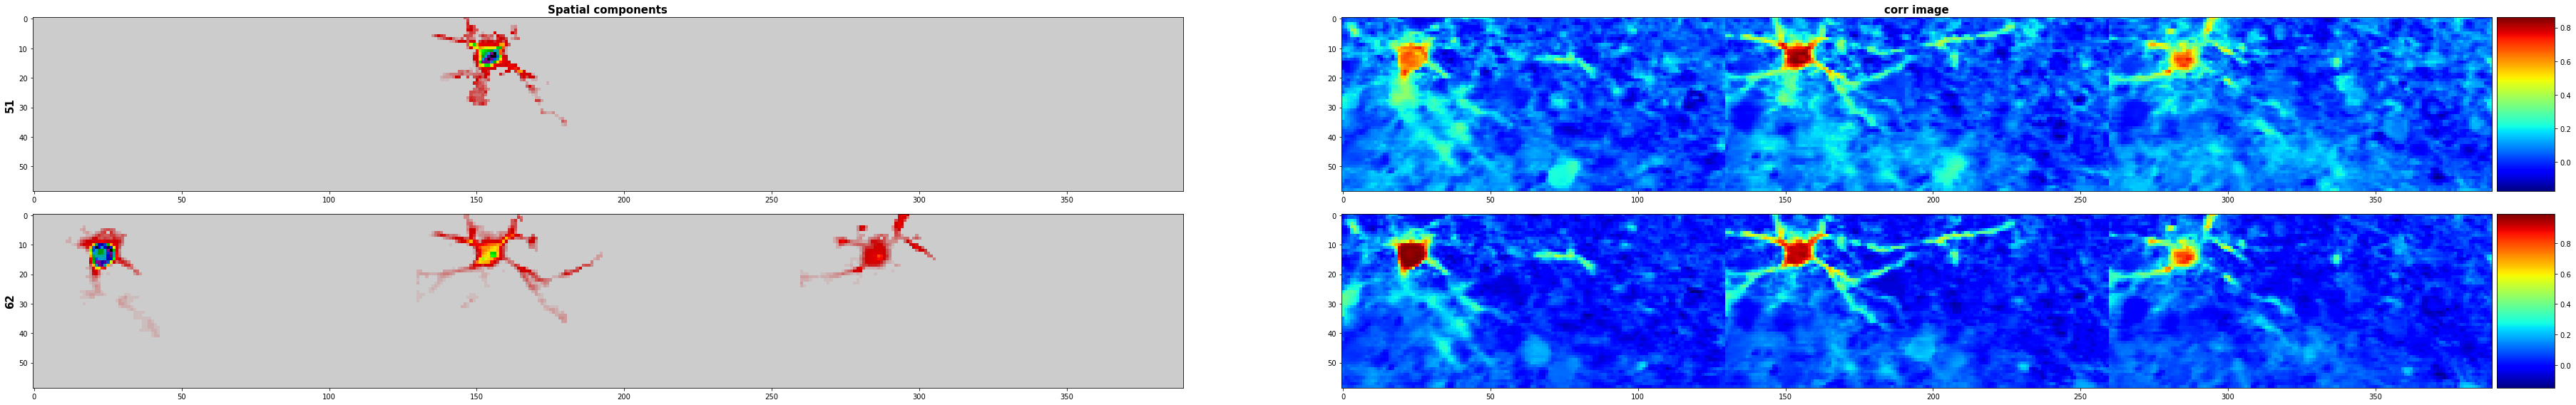

corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
time: 20.158180236816406
time: 5.3569111824035645
70.33148407936096


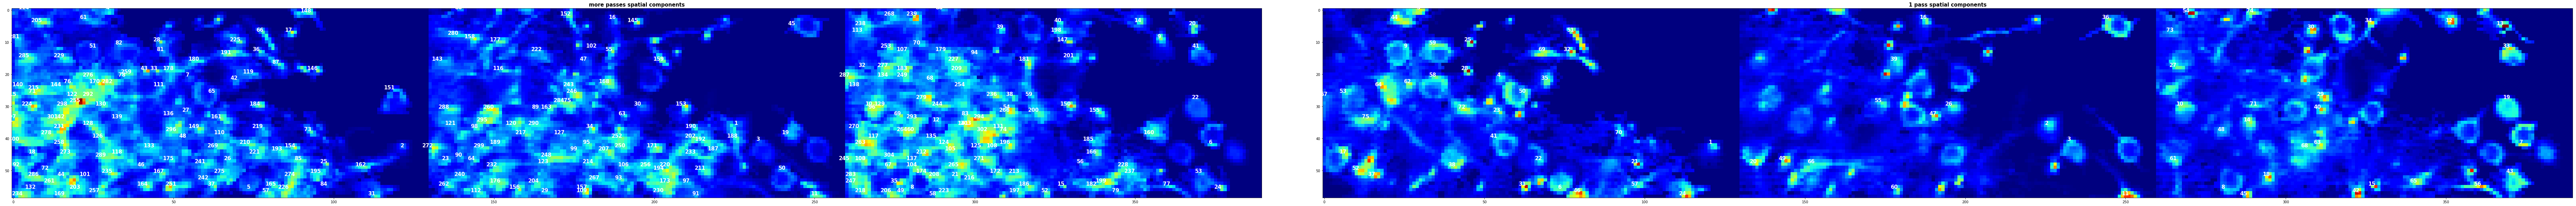

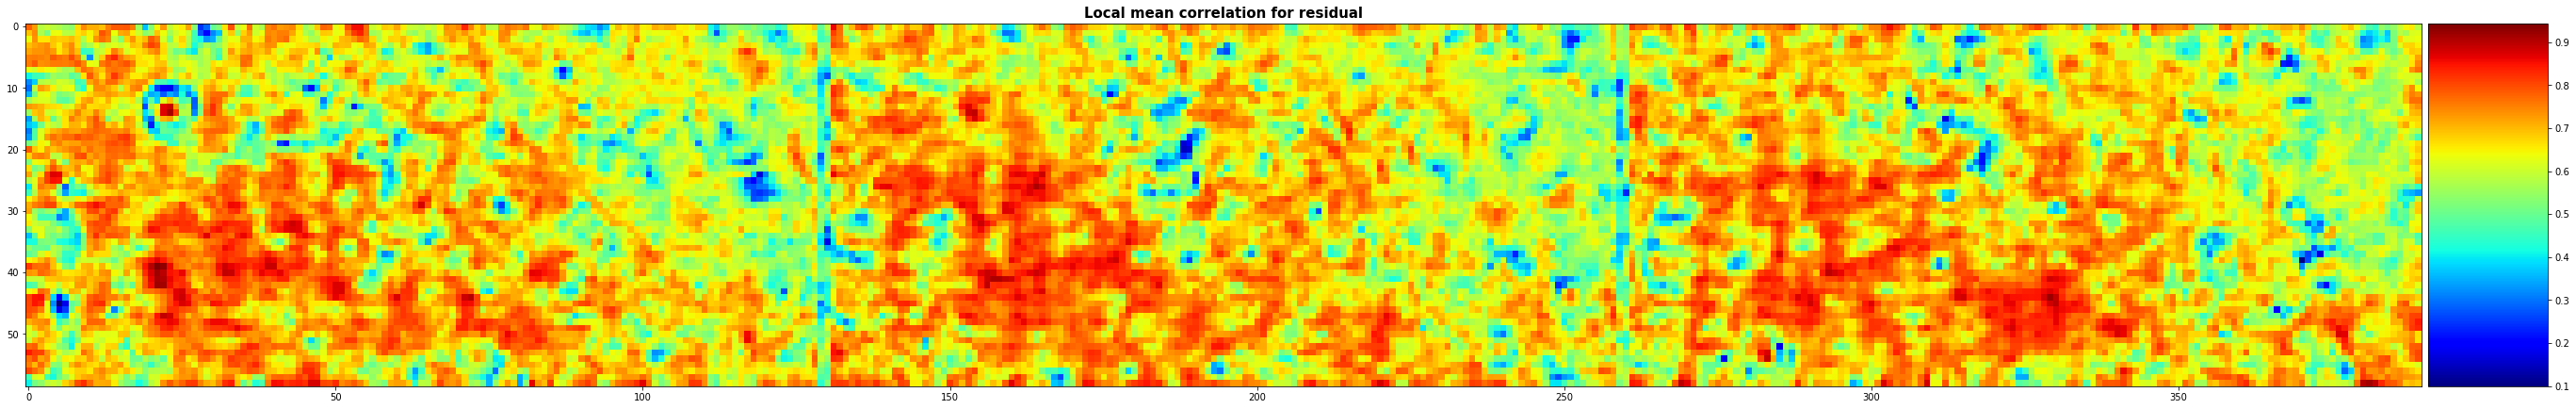

428.4820580482483


In [14]:
start=time.time()
rlt_nmf = sup.axon_pipeline_Y(Yd[:,:,:], cut_off_point=[0.92,0.87,0.82], length_cut=[10,10,10], th=[2,1,0],pass_num=3,
                residual_cut = [0.6,0.6,0.6],corr_th_fix=0.2,max_allow_neuron_size=0.3,merge_corr_thr=0.6,merge_overlap_thr=0.6, num_plane=3, 
                patch_size=[100,100],plot_en=True, TF=False, fudge_factor=1, text=True,bg=4,max_iter=5,max_iter_fin=5,
                update_after=2)
print(time.time()-start)

In [36]:
np.save(out_dir + "rlt_Yd_3pass.npy", rlt_nmf)

In [10]:
rltk = rlt_nmf["fin_rlt"].copy()

In [16]:
fig = sup.spatial_comp_plot(rltk["a"][:,:], rltk["corr_img_all_r"][:,:,:]);
fig.savefig(out_dir + "spatial_Yd_2pass.pdf")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [17]:
fig = sup.temporal_compare_plot(rltk["c"][:,:], rltk["c_tf"][:,:]);
fig.savefig(out_dir + "temporal_Yd_2pass.pdf")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
